# Importing Resources 


In [1]:
import tensorflow as tf

In [2]:

from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

The CIFAR10 has 50,000 32x32 color training images and <b>10,000 test images by default, labeled over 10 categories</b>. The training dataset is further split into 80-20 ratio to get <b>10,000 images in training set. The 10,000 images in testing set is used for validation</b>. The 10 classes of data is as follows: ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Loading Dataset

In [3]:
(trainX, trainy), (validateX1, validatey1) = cifar10.load_data()
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Preprocessing


##  Splitting Dataset into Train - Validate - Test

In [4]:
# Splitting the training dataset to create new training and validation set
trainX1,testX,trainy1,testy = train_test_split(trainX,trainy,test_size = 0.8,random_state = 100)

In [5]:
print('There are {:,} images in the Training set'.format(trainX1.shape[0]))
print('There are {:,} images in the Validation set'.format(validateX1.shape[0]))
print('There are {:,} images in the test set'.format(testX.shape[0]))

There are 10,000 images in the Training set
There are 10,000 images in the Validation set
There are 40,000 images in the test set


## Normalization and Creating Batch

In [6]:
print("The shape of training dataset is: ", trainX1.shape)
print("The shape of validation dataset is: ", validateX1.shape)
# normalizing the values. The default range is 0-255. Thus on min-max normalization, the range would be 0-1
trainX1 = trainX1.astype('float32')/255
validateX1 = validateX1.astype('float32')/255
testX = testX.astype('float32')/255


The shape of training dataset is:  (10000, 32, 32, 3)
The shape of validation dataset is:  (10000, 32, 32, 3)


In [7]:

# Creating batches of dataset.To do so, we have to convert the variable of type 'nparray'
# to type 'tensor', which is done by using the command tf.data.Dataset.from_tensor_slices
training_batch = tf.data.Dataset.from_tensor_slices((trainX1,trainy1)).batch(32)
test_batch = tf.data.Dataset.from_tensor_slices((testX,testy))
validation_batch = tf.data.Dataset.from_tensor_slices((validateX1,validatey1))

## Multi Layer Perceptron

The multilayer perceptron is having 2 hidden layers, with each hidden layer having 512 nodes. Since there are 10 classes of data, the number of output nodes are 10. Each image is having 32 x 32 pixels with 3 colour layers (RGB). There there are
32x32x3 = 3072 features per image. keras.sequential is used for sequential flow in the MLP. The flatten layer is used to reshape the input image. The dense layer is the hidden layer( inputs are no of nodes and activation function)

In [8]:
tf.keras.backend.clear_session()
mlp = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (32,32,3)),
                                tf.keras.layers.Dense(512,activation = 'sigmoid'),
                                tf.keras.layers.Dense(512,activation = 'sigmoid'),
                                tf.keras.layers.Dense(10,activation = 'softmax')])
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


We are using sigmoid activation function for the hidden layers, as described in the question. The output layer is using softmax activation function since predicts the probability that the input belongs to a particular category. The output node with the highest probability value categorises the input. The weights and bias are automatically initialised


In [9]:
# Using adam optimiser for weight training
mlp.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
Epoch = 5
history_mlp = mlp.fit(training_batch,epochs=Epoch,validation_data=(validateX1,validatey1))

Epoch 1/5
313/313 [==============================] - 8s 27ms/step - loss: 2.0743 - accuracy: 0.2302 - val_loss: 2.0363 - val_accuracy: 0.2522
Epoch 2/5
313/313 [==============================] - 8s 26ms/step - loss: 1.9160 - accuracy: 0.2967 - val_loss: 1.9920 - val_accuracy: 0.2862
Epoch 3/5
313/313 [==============================] - 8s 26ms/step - loss: 1.8510 - accuracy: 0.3243 - val_loss: 1.9345 - val_accuracy: 0.3099
Epoch 4/5
313/313 [==============================] - 8s 26ms/step - loss: 1.8051 - accuracy: 0.3430 - val_loss: 1.8424 - val_accuracy: 0.3361
Epoch 5/5
313/313 [==============================] - 8s 26ms/step - loss: 1.7579 - accuracy: 0.3590 - val_loss: 1.8275 - val_accuracy: 0.3450


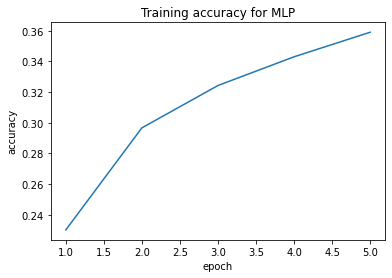

In [11]:
# training Curve
plt.plot([1,2,3,4,5],history_mlp.history['accuracy'])
plt.title('Training accuracy for MLP')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

#### The training accuracy increases with the increasing value of epochs and is maximum at 5th epoch with its value approximating 35.95%

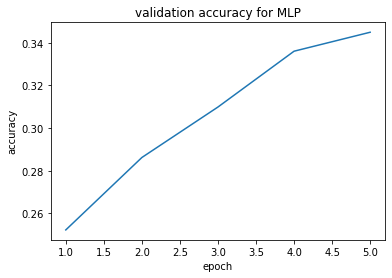

In [12]:
# validation curve
plt.plot([1,2,3,4,5],history_mlp.history['val_accuracy'])
plt.title('validation accuracy for MLP')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

#### The validation accuracy increases with epoch values, its max value is 34.56% for epoch = 5

In [16]:
loss_mlp_test,accuracy =mlp.evaluate(testX,testy) 

1250/1250 [==============================] - 14s 11ms/step - loss: 1.8381 - accuracy: 0.3393


In [17]:
print("The test accuracy for MLP is:", acc_mlp_test)

The test accuracy for MLP is: 0.3393000066280365




## Changing Hidden Layers and Nodes

### Changing Hidden Layers


In [18]:
tf.keras.backend.clear_session()
accuracy_layers = []
# 1 hidden Layer
model_layer4 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (32,32,3)),
                                tf.keras.layers.Dense(512,activation = 'sigmoid'),tf.keras.layers.Dense(10,activation = 'softmax')])
model_layer4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print("---------------1 Hidden Layer ----------------------")
model_layer4.fit(training_batch, epochs=5)
loss,acc = model_layer4.evaluate(validateX1,validatey1)
accuracy_layers.append(acc)
#2 hidden Layer
accuracy_layers.append(accuracy)
# 3 hidden Layer
model_layer3 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (32,32,3)),
                                tf.keras.layers.Dense(512,activation = 'sigmoid'),tf.keras.layers.Dense(512,activation = 'sigmoid'),
                                tf.keras.layers.Dense(512,activation = 'sigmoid'),tf.keras.layers.Dense(10,activation = 'softmax')])
model_layer3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print("---------------3 Hidden Layer ----------------------")
model_layer3.fit(training_batch, epochs=5)
loss,acc = model_layer3.evaluate(validateX1,validatey1)
accuracy_layers.append(acc)
# 5 hidden Layers
model_layer1 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (32,32,3)),
                                tf.keras.layers.Dense(512,activation = 'sigmoid'),tf.keras.layers.Dense(512,activation = 'sigmoid'),
                                tf.keras.layers.Dense(512,activation = 'sigmoid'),tf.keras.layers.Dense(512,activation = 'sigmoid'),
                                tf.keras.layers.Dense(512,activation = 'sigmoid'),tf.keras.layers.Dense(10,activation = 'softmax')])
model_layer1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print("---------------5 Hidden Layer ----------------------")
model_layer1.fit(training_batch, epochs=5)
loss,acc = model_layer1.evaluate(validateX1,validatey1)
accuracy_layers.append(acc)
# 10 hidden layers
model_layer2 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (32,32,3)),
                                tf.keras.layers.Dense(512,activation = 'sigmoid'),tf.keras.layers.Dense(512,activation = 'sigmoid'),
                                tf.keras.layers.Dense(512,activation = 'sigmoid'),tf.keras.layers.Dense(512,activation = 'sigmoid'),
                                tf.keras.layers.Dense(512,activation = 'sigmoid'),tf.keras.layers.Dense(512,activation = 'sigmoid'),
                                tf.keras.layers.Dense(512,activation = 'sigmoid'),tf.keras.layers.Dense(512,activation = 'sigmoid'),
                                tf.keras.layers.Dense(512,activation = 'sigmoid'),tf.keras.layers.Dense(10,activation = 'softmax')])
model_layer2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print("---------------10 Hidden Layer ----------------------")
model_layer2.fit(training_batch, epochs=5)
loss,acc = model_layer2.evaluate(validateX1,validatey1)
accuracy_layers.append(acc)


---------------1 Hidden Layer ----------------------
Epoch 1/5
313/313 [==============================] - 4s 13ms/step - loss: 2.0762 - accuracy: 0.2525
Epoch 2/5
313/313 [==============================] - 4s 13ms/step - loss: 1.8741 - accuracy: 0.3196
Epoch 3/5
313/313 [==============================] - 4s 14ms/step - loss: 1.8052 - accuracy: 0.3498
Epoch 4/5
313/313 [==============================] - 4s 14ms/step - loss: 1.7592 - accuracy: 0.3668
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 1.7528 - accuracy: 0.3757
---------------3 Hidden Layer ----------------------
Epoch 1/5
313/313 [==============================] - 7s 22ms/step - loss: 2.1108 - accuracy: 0.2055
Epoch 2/5
313/313 [==============================] - 7s 22ms/step - loss: 1.9536 - accuracy: 0.2743
Epoch 3/5
313/313 [==============================] - 7s 21ms/step - loss: 1.8899 - accuracy: 0.3030
Epoch 4/5
313/313 [==============================] - 7s 21ms/step - loss: 1.8392 - accuracy: 0.

In [19]:
accuracy_layers

[0.3756999969482422,
 0.3393000066280365,
 0.3305000066757202,
 0.19460000097751617,
 0.10000000149011612]

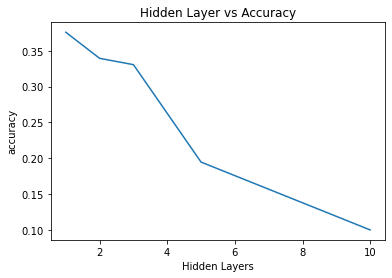

In [20]:
plt.plot([1,2,3,5,10],accuracy_layers)
plt.title('Hidden Layer vs Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Hidden Layers')
plt.show()

#### Thus as the number of hidden layer increases, the accuracy of the model decreases

### Changing Nodes 

The number of hidden layers are kept at 2 since these values provides the highest accuracy for a given number of nodes

In [21]:
tf.keras.backend.clear_session()
accuracy_nodes = []
# 128 nodes 
print("------------------------- 128 nodes -----------------------------------")
model_nodes1 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (32,32,3)),
                                tf.keras.layers.Dense(128,activation = 'sigmoid'),
                                tf.keras.layers.Dense(128,activation = 'sigmoid'),
                                tf.keras.layers.Dense(10,activation = 'softmax')])
model_nodes1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_nodes1.fit(training_batch, epochs = 5)
loss,acc = model_nodes1.evaluate(validateX1,validatey1)
accuracy_nodes.append(acc)
# 256 nodes 
print("------------------------- 256 nodes -----------------------------------")
model_nodes2 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (32,32,3)),
                                tf.keras.layers.Dense(256,activation = 'sigmoid'),
                                tf.keras.layers.Dense(256,activation = 'sigmoid'),
                                tf.keras.layers.Dense(10,activation = 'softmax')])
model_nodes2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_nodes2.fit(training_batch, epochs = 5)
loss,acc = model_nodes2.evaluate(validateX1,validatey1)
accuracy_nodes.append(acc)
# 512 nodes
accuracy_nodes.append(accuracy)
# 1024 nodes 
print("------------------------- 1024 nodes -----------------------------------")
model_nodes3 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (32,32,3)),
                                tf.keras.layers.Dense(1024,activation = 'sigmoid'),
                                tf.keras.layers.Dense(1024,activation = 'sigmoid'),
                                tf.keras.layers.Dense(10,activation = 'softmax')])
model_nodes3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_nodes3.fit(training_batch, epochs = 5)
loss,acc = model_nodes3.evaluate(validateX1,validatey1)
accuracy_nodes.append(acc)
# 2048 nodes 
print("------------------------- 2048 nodes -----------------------------------")
model_nodes4 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (32,32,3)),
                                tf.keras.layers.Dense(2048,activation = 'sigmoid'),
                                tf.keras.layers.Dense(2048,activation = 'sigmoid'),
                                tf.keras.layers.Dense(10,activation = 'softmax')])
model_nodes4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_nodes4.fit(training_batch, epochs = 5)
loss,acc = model_nodes4.evaluate(validateX1,validatey1)
accuracy_nodes.append(acc)



------------------------- 128 nodes -----------------------------------
Epoch 1/5
313/313 [==============================] - 2s 6ms/step - loss: 2.1143 - accuracy: 0.2184
Epoch 2/5
313/313 [==============================] - 2s 5ms/step - loss: 1.9239 - accuracy: 0.2987
Epoch 3/5
313/313 [==============================] - 2s 5ms/step - loss: 1.8530 - accuracy: 0.3321
Epoch 4/5
313/313 [==============================] - 2s 8ms/step - loss: 1.7954 - accuracy: 0.3560
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 1.7808 - accuracy: 0.3632
------------------------- 256 nodes -----------------------------------
Epoch 1/5
313/313 [==============================] - 3s 8ms/step - loss: 2.0536 - accuracy: 0.2381
Epoch 2/5
313/313 [==============================] - 3s 8ms/step - loss: 1.9029 - accuracy: 0.3015
Epoch 3/5
313/313 [==============================] - 3s 8ms/step - loss: 1.8358 - accuracy: 0.3318
Epoch 4/5
313/313 [==============================] - 3s 8ms/step

In [22]:
accuracy_nodes

[0.36320000886917114,
 0.3441999852657318,
 0.3393000066280365,
 0.3327000141143799,
 0.30640000104904175]

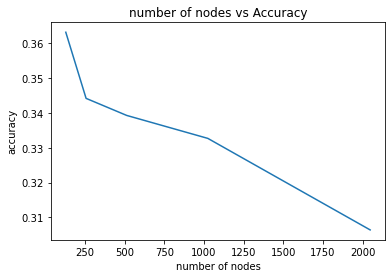

In [23]:
plt.plot([128,256,512,1024,2048],accuracy_nodes)
plt.title('number of nodes vs Accuracy')
plt.ylabel('accuracy')
plt.xlabel('number of nodes')
plt.show()

### The maximum accuracy is achieved when nodes are 256 and hidden layers 2

# CNN 1

In [24]:
tf.keras.backend.clear_session()
cnn1 = tf.keras.Sequential([ tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (32,32,3)),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                              tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512,activation = 'sigmoid'),
                             tf.keras.layers.Dense(512,activation = 'sigmoid'),
                             tf.keras.layers.Dense(10,activation = 'softmax')])
cnn1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               25690624  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 25,997,130
Trainable params: 25,997,130
Non-trainable params: 0
____________________________________________

In [25]:
cnn1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
history1 = cnn1.fit(trainX1,trainy1,epochs=5,validation_data = (validateX1,validatey1))

Epoch 1/5
313/313 [==============================] - 92s 295ms/step - loss: 1.8306 - accuracy: 0.3228 - val_loss: 1.5988 - val_accuracy: 0.4143
Epoch 2/5
313/313 [==============================] - 96s 308ms/step - loss: 1.3912 - accuracy: 0.4922 - val_loss: 1.4157 - val_accuracy: 0.4863
Epoch 3/5
313/313 [==============================] - 92s 294ms/step - loss: 1.1036 - accuracy: 0.6042 - val_loss: 1.3349 - val_accuracy: 0.5264
Epoch 4/5
313/313 [==============================] - 93s 298ms/step - loss: 0.7931 - accuracy: 0.7226 - val_loss: 1.5037 - val_accuracy: 0.5140
Epoch 5/5
313/313 [==============================] - 97s 309ms/step - loss: 0.4633 - accuracy: 0.8510 - val_loss: 1.5946 - val_accuracy: 0.5382


In [27]:
loss_cnn1_val,acccuracy_cnn1_val = cnn1.evaluate(validateX1,validatey1)

313/313 [==============================] - 11s 36ms/step - loss: 1.5946 - accuracy: 0.5382


In [28]:
loss_cnn1_test,accuracy_cnn1_test = cnn1.evaluate(testX,testy)

1250/1250 [==============================] - 49s 39ms/step - loss: 1.5853 - accuracy: 0.5358


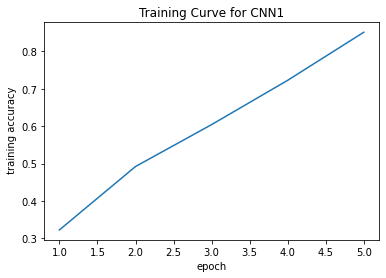

In [29]:
plt.plot([1,2,3,4,5],history1.history['accuracy'])
plt.title('Training Curve for CNN1')
plt.ylabel(' training accuracy')
plt.xlabel('epoch')
plt.show()

#### The training curve for CNN1 shows that the accuracy increases with epoch and attains training accuracy of almot 90% at epoch = 5

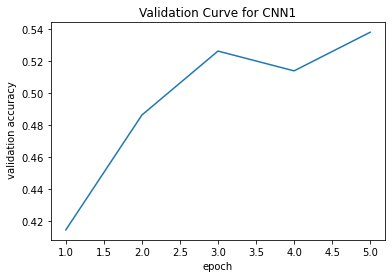

In [30]:
plt.plot([1,2,3,4,5],history1.history['val_accuracy'])
plt.title('Validation Curve for CNN1')
plt.ylabel(' validation accuracy')
plt.xlabel('epoch')
plt.show()

#### The validation curve for CNN1 is gradually increasing with approx validation accuracy of 54% at eoch 3 and 5

## CNN2

In [31]:
tf.keras.backend.clear_session()
cnn2 = tf.keras.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (32,32,3)),
                            tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                            tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                            tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(512,activation = 'sigmoid'),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Dense(512,activation = 'sigmoid'),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Dense(10,activation = 'softmax')])
cnn2.summary()                                                          

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1180160   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0

In [32]:
cnn2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
history2 = cnn2.fit(trainX1,trainy1,epochs=5,validation_data = (validateX1,validatey1))

Epoch 1/5
313/313 [==============================] - 23s 72ms/step - loss: 2.0062 - accuracy: 0.2459 - val_loss: 1.6371 - val_accuracy: 0.3890
Epoch 2/5
313/313 [==============================] - 19s 61ms/step - loss: 1.5718 - accuracy: 0.4189 - val_loss: 1.4689 - val_accuracy: 0.4592
Epoch 3/5
313/313 [==============================] - 21s 68ms/step - loss: 1.4053 - accuracy: 0.4899 - val_loss: 1.3358 - val_accuracy: 0.5120
Epoch 4/5
313/313 [==============================] - 22s 69ms/step - loss: 1.2829 - accuracy: 0.5315 - val_loss: 1.3873 - val_accuracy: 0.5168
Epoch 5/5
313/313 [==============================] - 21s 68ms/step - loss: 1.1790 - accuracy: 0.5760 - val_loss: 1.2819 - val_accuracy: 0.5396


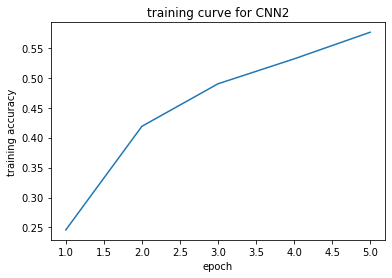

In [34]:
plt.plot([1,2,3,4,5],history2.history['accuracy'])
plt.title('training curve for CNN2')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.show()

#### The training curve for CNN2 show a sttep increase in training accuracy values, with max accouracy approximating 76% at epoch = 5

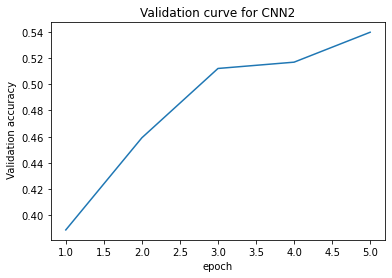

In [35]:
plt.plot([1,2,3,4,5],history2.history['val_accuracy'])
plt.title('Validation curve for CNN2')
plt.ylabel(' Validation accuracy')
plt.xlabel('epoch')
plt.show()

#### The validation curve for CNN2 shows that the validation accuracy is gradually increasing with accuracy of almost 60% at epoch = 5

In [36]:
loss_cnn2_test,accuracy_cnn2_test = cnn2.evaluate(testX,testy)

1250/1250 [==============================] - 17s 14ms/step - loss: 1.2918 - accuracy: 0.5376


In [37]:
print(" The test accuracy for CNN2 is:", accuracy_cnn2_test)

 The test accuracy for CNN2 is: 0.5376250147819519


### Improved model for CNN2

In [38]:
tf.keras.backend.clear_session()
cnn2_1 = tf.keras.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (32,32,3)),
                            tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                            tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(512,activation = 'sigmoid'),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Dense(512,activation = 'sigmoid'),
                            #tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Dense(10,activation = 'softmax')])
cnn2_1.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               5538304   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               2

In [39]:
cnn2_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history2 = cnn2_1.fit(trainX1,trainy1,epochs=5,validation_data = (validateX1,validatey1))

Epoch 1/5
313/313 [==============================] - 33s 105ms/step - loss: 1.8406 - accuracy: 0.3091 - val_loss: 1.4644 - val_accuracy: 0.4709
Epoch 2/5
313/313 [==============================] - 31s 100ms/step - loss: 1.4415 - accuracy: 0.4752 - val_loss: 1.3352 - val_accuracy: 0.5125
Epoch 3/5
313/313 [==============================] - 32s 102ms/step - loss: 1.2481 - accuracy: 0.5496 - val_loss: 1.3970 - val_accuracy: 0.5085
Epoch 4/5
313/313 [==============================] - 32s 101ms/step - loss: 1.0601 - accuracy: 0.6235 - val_loss: 1.2479 - val_accuracy: 0.5608
Epoch 5/5
313/313 [==============================] - 31s 98ms/step - loss: 0.8633 - accuracy: 0.6959 - val_loss: 1.1802 - val_accuracy: 0.5915


## Report

1. The dataset is downloaded for keras.datasets. This dataset contains 50,000 training images and 10,000 testing images by default. The training dataset is reduced to 10,000 values by using train_test_split method. The downloaded test dataset is used for validation. The 40,000 leftover data from the training set is used for testing. Thus we got 10,000 training data, 10,000 validation data and 40,000 testing data. The input dataset is normalized using min max normalization. Thus, the resulting value lies between 0-1. Batches of 32 are created on the train, validation and test. The default batch size for a model is 32.
2. The output layer consists of 10 nodes since there are 10 categorical outputs. The activation function used here is softmax  which predicts the probability of the categorical output. This setting remains same for all the 3 networks since the target output is the same. The loss function used here is 'sparse_categorical_crossentropy' since the output values integers ranging from 1-10 and have probabilistic outputs.
3.The training and testing accuracy is lowest for MLP. It attains an accuracy of around 36% for training dataset. The CNN1 attains an accuracy of 90% for training set and 53% for testing set. The CNN2 has an accuracy of 56% for training and 54% for testing dataset. There is a large difference in the training accuracy and testing accuracy of CNN1 which might be because of overfitting. This is removed in CNN2 by using Drop(0.2). Due to this, there is no much difference between training accuracy and test accuracy of CNN2. Thus the CNN2 performs the best amongst the 3 models.
4. Changing the hidden layers and nodes will impact the accuracy of the model. For number of hidden layers ranging from 2-10, the accuracy is decreased as the hidden layer increases. This can also be seen in the hidden layer vs accuracy plot of MLP. Now for the best value of hidden layer i.e 2 the nodes are varied from 128 - 2048 ( discrete values are selected ). The accuracy decreases after a cetain increase in number of nodes and attains best value when number of nodes are 512. The nodes vs accuracy graph is plotted for better visualization. The training and validation curves are plotted and the model attains accuracy of 35.95 for training and 34.56 for validation. The test accuracy is 34.35.
5. The training and validation curves are plotted for CNN1 and CNN2 using the hyper parameters stated in the question. The training time CNN1 is high when compared to that of CNN2. It takes almost 750 seconds to run CNN1 whereas it takes almost 150 seconds for CNN2. Thus CNN2 is almost 5 times faster than CNN1. This is because:
CNN1 has 25,997,130 parameters to train whereas CNN2 has only 1,486,666 parameters. These values can be seen in the summary of the model. Thus the training parameters of CNN1 are almost 17 times more than CNN2 due to which the training time increases. The training parameters are calculated based on the architecture of the model. However, though the training time and parameters are large for CNN1, they produce better accuracy than CNN2. Increasing the number of epoch's will increase the accuracy till some extent and then it will almost remain constant no matter how much we increase the epoch values. 
6. From the changing accuracies of MLP for hidden layers and nodes, we concluded that hidden layer = 2 and hidden nodes = 512 gives max accuracy. This is what is specified in the problem statement as well. However, the sigmoid activation function reduces the accuracy. Thus, if we use Relu activation function for this dataset, the accuracy can be improved . When the CNN1 model was run on 40,000 training datasets, the average accuracy was 96% which shows that the given parameters are a perfect fit. It also proves the fact that 2 hidden layers provides a better accuracy for this dataset. Since the training dataset is reduced to 10,000 the accuracy is dropped to approx 90%. Thus, by changing the number of training samples accuracy of CNN1 can be improved. The case of overfitting can be removed by dropping some values by using the Drop() function. Similarly, accuracy the CNN2 model can be improved by removing the max pooling layer before the flatten command and remove droop(0.2) before output layer. By doing this, the accuracy almost improved by 15%. It can further be improved by increasing epochs and training samples
